In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.model_selection import train_test_split

In [15]:
data_dir = r'C:\Users\User\Desktop\flowers'

categories = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip']

data = []

def make_data():
    for category in categories:
        path = os.path.join(data_dir , category) 
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path , img_name)
            image = cv2.imread(image_path)
            ##break
        #break
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

            try:
                image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
                image = cv2.resize(image , (224,224))
                image = np.array(image , dtype=np.float32)
                
                data.append([image, label])
            except Exception as e:
                pass

        #print(len(data))
    pik = open('data.pickle', 'wb')
    pickle.dump(data , pik)
    pik.close()

  
make_data()

def load_data():
    pick=open('data.pickle','rb')
    
    data =pickle.load(pick)
    pick.close()

    np.random.shuffle(data)
    
    
    feature = []
    labels =[]

    for img,label in data:
        feature.append(img)
        labels.append(label)
    feature=np.array(feature,dtype=np.float32)
    labels=np.array(labels)
    feature = feature/255.0
    
    

    return [feature, labels]

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

(feature , labels) = load_data()

x_train, x_test, y_train, y_test = train_test_split(feature , labels , test_size = 0.1)

categories = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip']

input_layer = tf.keras.layers.Input([224,224,3])

conv1 = tf.keras.layers.Conv2D(filters= 32 ,kernel_size=(5,5) , padding='Same' , activation='relu')(input_layer)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters= 64 , kernel_size=(3,3), padding='Same',activation='relu')(pool1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters= 96, kernel_size=(3,3),padding='Same' , activation='relu')(pool2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters= 96, kernel_size=(3,3),padding='Same' , activation='relu')(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)

flt1 = tf.keras.layers.Flatten()(pool4)

dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)
out = tf.keras.layers.Dense(5,activation='softmax')(dn1)

model = tf.keras.Model(input_layer, out)
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train , y_train , batch_size= 100 , epochs=10)

model.save('mymodel.h5')

Train on 3890 samples
3890/3890 [==============================] - 424s 109ms/sample - loss: 1.4854 - accuracy: 0.3763


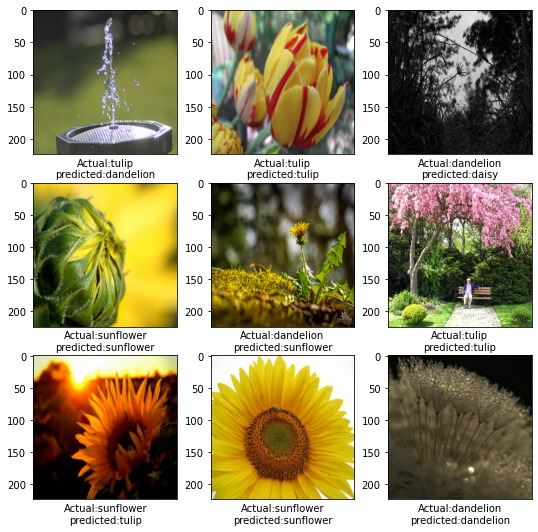

In [18]:
(feature , labels) = load_data()

x_train, x_test, y_train, y_test = train_test_split(feature , labels , test_size = 0.1)

categories = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip']

model = tf.keras.models.load_model('mymodel.h5')

#model.evaluate(x_test, y_test, verbose = 1) 

prediction = model.predict(x_test)

plt.figure(figsize=(9,9))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.xlabel('Actual:'+categories[y_test[i]]+'\n'+'predicted:'+categories[np.argmax(prediction[i])])

    plt.xticks([])

plt.show()